In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pickle


from qubic.lib.Qgps import GPSCalsource, GPSAntenna
 
%matplotlib inline

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [2]:
### Build GPS data file path
#data_path = "Manip_21-03-25/calsource_orientation.dat"
data_path = "calsource_orientation_20240322.dat"

### Define the distance between the two antennas
distance_between_antennas = 1.3

We will start by building only the GPSAntenna instance. The idea is to use it to have access to the gps data and to the antennas position at any time, and use them to build the initial positions of the system.
In real case, this step will also be needed, as we need to define the initial position of the antennas in (Norht, East, Down) coordinates.
It is also usefull as it allows to visualize the data with the "plot_gps_data" function, and also to define the observation indices needed for further steps.

In [3]:
### Build the GPSAntenna instance

#data = pickle.load(open('calsource_orientation.pkl', 'rb'))
gps_antenna = GPSAntenna(data_path, distance_between_antennas)

2024-03-22 09:47:49


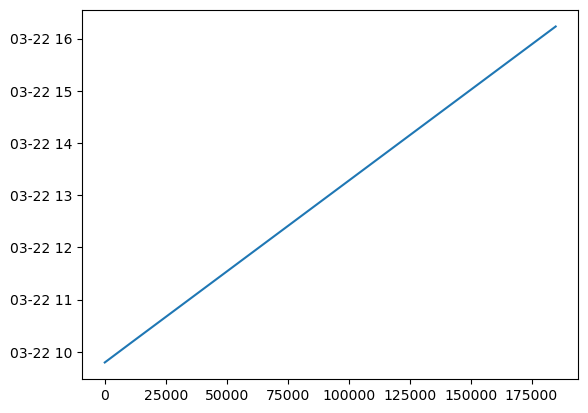

In [4]:
plt.plot(gps_antenna._datetime)
print(gps_antenna._datetime[0])

We plot all the data and define the initial observatin index.

In [5]:
#date = np.array([dt.datetime(year=2025, month=3, day=21, hour=14, minute=24, second=0)])
#date = np.array([dt.datetime(year=2024, month=11, day=20, hour=8, minute=21, second=0)])
date = np.array([dt.datetime(year=2024, month=3, day=22, hour=9, minute=47, second=49)])
index_ini = gps_antenna.get_observation_indices(gps_antenna._datetime, date)
print('Initial index = ', index_ini)
print('size observation times : ', len(gps_antenna._datetime))

Initial index =  [0]
size observation times :  184894


In [ ]:
gps_antenna.plot_gps_data_plotly(index_ini[0])

We use the previous GPSAntenna instance to define all the initial positions. This is mandatory to initialize the GPSCalsource instance.
gps will then contains all the needed information to caracterize the GPS system.

In [ ]:
#index_0 = gps_antenna.datetime_to_index(gps_antenna._datetime, dt.datetime(year=2024, month=11, day=20, hour=10, minute=26, second=0))
index_0 = gps_antenna.datetime_to_index(gps_antenna._datetime, dt.datetime(year=2024, month=3, day=22, hour=10, minute=2, second=54))
position_ini_antenna1 = gps_antenna.position_antenna1[:, index_0]
position_ini_antenna2 = gps_antenna.position_antenna2[:, index_0]
position_ini_calsource = position_ini_antenna1.copy()
position_ini_calsource += np.array([0., 0., -0.1])

By defining the observation, we can plot the system at this time.

In [ ]:
# observation_date = np.array([dt.datetime(2025, 3, 21, 14, 40, 0)]) 
# observation_date = np.array([dt.datetime(year=2024, month=11, day=20, hour=10, minute=37, second=0)])
observation_date = np.array([dt.datetime(year=2024, month=3, day=22, hour=10, minute=7, second=45)])
gps = GPSCalsource(data_path, position_ini_antenna1, position_ini_antenna2, position_ini_calsource, observation_date, distance_antennas=None, position_qubic = np.array([0.54 + (-0.99 + 0.54), 1.07 + (0.15 + 1.07),  -0.4]))# np.array([0, 0, 0]))

The observation indices are :  [9495]


/home/laclavere/Thesis/qubic/qubic/lib/Qgps.py:619: RuntimeWarning:

invalid value encountered in divide



In [ ]:
observation_index = gps_antenna.get_observation_indices(gps_antenna._datetime, observation_date)
gps.plot_calsource_deviation(observation_index[0])

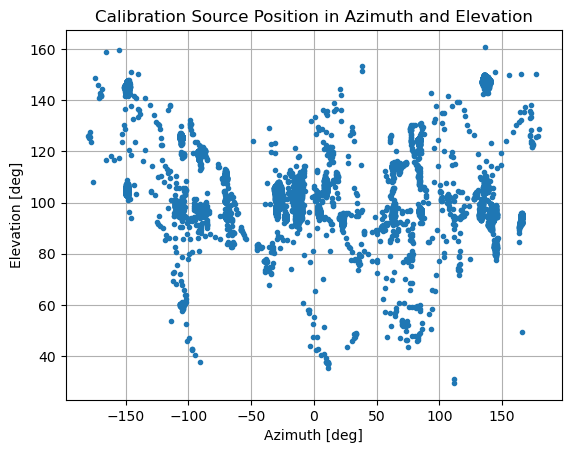

In [ ]:
gps.plot_position_calsource_azel()